## Final Project Submission

Please fill out:
* Student name: 
* Student pace: self paced / part time / full time
* Scheduled project review date/time: 
* Instructor name: 
* Blog post URL:


# Importing Libraries and Data

In [1072]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn import metrics

import statsmodels.api as sm

from sklearn.feature_selection import RFE
from sklearn.preprocessing import MinMaxScaler

In [1073]:
# Import KC_Housing data into a DataFrame and show first 5 rows
df = pd.read_csv('kc_house_data.csv')
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,10/13/2014,221900.0,3,1.00,1180,5650,1.0,NaN,0.0,3,7,1180,0.0,1955,0.0,98178,47.5112,-122.257,1340,5650
1,6414100192,12/9/2014,538000.0,3,2.25,2570,7242,2.0,0.0,0.0,3,7,2170,400.0,1951,1991.0,98125,47.7210,-122.319,1690,7639
2,5631500400,2/25/2015,180000.0,2,1.00,770,10000,1.0,0.0,0.0,3,6,770,0.0,1933,NaN,98028,47.7379,-122.233,2720,8062
3,2487200875,12/9/2014,604000.0,4,3.00,1960,5000,1.0,0.0,0.0,5,7,1050,910.0,1965,0.0,98136,47.5208,-122.393,1360,5000
4,1954400510,2/18/2015,510000.0,3,2.00,1680,8080,1.0,0.0,0.0,3,8,1680,0.0,1987,0.0,98074,47.6168,-122.045,1800,7503


# Inspecting the Data

In [1074]:
# Listing out the number of non-null rows and datatypes for each Column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     19221 non-null  float64
 9   view           21534 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   17755 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1075]:
# Discovering the shape of the dataframe
df.shape

(21597, 21)

In [1076]:
# Used the .descibe() method to see some key statistics such as mean, std deviation, and quartile data
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.159700e+04,2.159700e+04,21597.000000,21597.000000,21597.000000,2.159700e+04,21597.000000,19221.000000,21534.000000,21597.000000,21597.000000,21597.000000,21597.000000,17755.000000,21597.000000,21597.000000,21597.000000,21597.000000,21597.000000
mean,4.580474e+09,5.402966e+05,3.373200,2.115826,2080.321850,1.509941e+04,1.494096,0.007596,0.233863,3.409825,7.657915,1788.596842,1970.999676,83.636778,98077.951845,47.560093,-122.213982,1986.620318,12758.283512
std,2.876736e+09,3.673681e+05,0.926299,0.768984,918.106125,4.141264e+04,0.539683,0.086825,0.765686,0.650546,1.173200,827.759761,29.375234,399.946414,53.513072,0.138552,0.140724,685.230472,27274.441950
min,1.000102e+06,7.800000e+04,1.000000,0.500000,370.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,3.000000,370.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.220000e+05,3.000000,1.750000,1430.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,1951.000000,0.000000,98033.000000,47.471100,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,1975.000000,0.000000,98065.000000,47.571800,-122.231000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068500e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


# Handling Null Values

In [1077]:
# Check for null values
df.isnull().sum()

id                  0
date                0
price               0
bedrooms            0
bathrooms           0
sqft_living         0
sqft_lot            0
floors              0
waterfront       2376
view               63
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated     3842
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

In [1078]:
# List the counts for waterfront data
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

In [1079]:
# List the counts for view data
df.view.value_counts()

0.0    19422
2.0      957
3.0      508
1.0      330
4.0      317
Name: view, dtype: int64

In [1080]:
# List the counts for yr_renovated data
df.yr_renovated.value_counts()

0.0       17011
2014.0       73
2003.0       31
2013.0       31
2007.0       30
          ...  
1946.0        1
1959.0        1
1971.0        1
1951.0        1
1954.0        1
Name: yr_renovated, Length: 70, dtype: int64

In [1081]:
# List the counts for yr_renovated data
df.waterfront.value_counts()

0.0    19075
1.0      146
Name: waterfront, dtype: int64

Based off the value counts for each of these columns, it would seem that 0 represents the following:
 - Waterfront: the house does not having a waterfront view 
 - View: the house has not been viewed
 - Yr_renovated: the house hasn't been renovated
 
Since the Null values are such a small percentage of the data, I will assume that these null values should be 0 and set them as so.

In [1082]:
# Set null values to 0
df.fillna(0, inplace=True)

In [1083]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

In [1084]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  object 
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

In [1085]:
df.waterfront.value_counts()

0.0    21451
1.0      146
Name: waterfront, dtype: int64

# Exploring  sqft_basement Column

I noticed while looking at the various datatypes of each column that sqft_basement was mysteriously listed as an object as opposed to an integer like all the other sqft columns were.  I decided to explore further.

In [1086]:
# List value counts for sqft_basement column
df.sqft_basement.value_counts()

0.0       12826
?           454
600.0       217
500.0       209
700.0       208
          ...  
2310.0        1
2390.0        1
1913.0        1
2240.0        1
1024.0        1
Name: sqft_basement, Length: 304, dtype: int64

As I expected there are some basements with a sqft of ?, which needs to be changed to an actual number. I am still able to figure out the sqft that should be listed for these ? values though by subtracting sqft_above from sqft_living. I will then replace all these values with the calulated sqft as opposed to replacing the ? with zeroes as I did with the null values.

In [1087]:
# Calculate and replace the sqft_basement for each row
df['sqft_basement'] = df['sqft_living'] - df['sqft_above']

In [1088]:
# Check value counts for sqft_basement column again to ensure ? are gone
df.sqft_basement.value_counts()

0       13110
600       221
700       218
500       214
800       206
        ...  
792         1
2590        1
935         1
2390        1
248         1
Name: sqft_basement, Length: 306, dtype: int64

In [1089]:
# Convert the sqft_basement column to an integer
df.sqft_basement = df.sqft_basement.astype(np.float64)

In [1090]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21597 entries, 0 to 21596
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21597 non-null  int64  
 1   date           21597 non-null  object 
 2   price          21597 non-null  float64
 3   bedrooms       21597 non-null  int64  
 4   bathrooms      21597 non-null  float64
 5   sqft_living    21597 non-null  int64  
 6   sqft_lot       21597 non-null  int64  
 7   floors         21597 non-null  float64
 8   waterfront     21597 non-null  float64
 9   view           21597 non-null  float64
 10  condition      21597 non-null  int64  
 11  grade          21597 non-null  int64  
 12  sqft_above     21597 non-null  int64  
 13  sqft_basement  21597 non-null  float64
 14  yr_built       21597 non-null  int64  
 15  yr_renovated   21597 non-null  float64
 16  zipcode        21597 non-null  int64  
 17  lat            21597 non-null  float64
 18  long  

# Handling Outliers

I first want to check for outliers in the non-sqft features. These include bedrooms, bathrooms, and floors. I will do this using boxplots and checking the value counts for each feature.

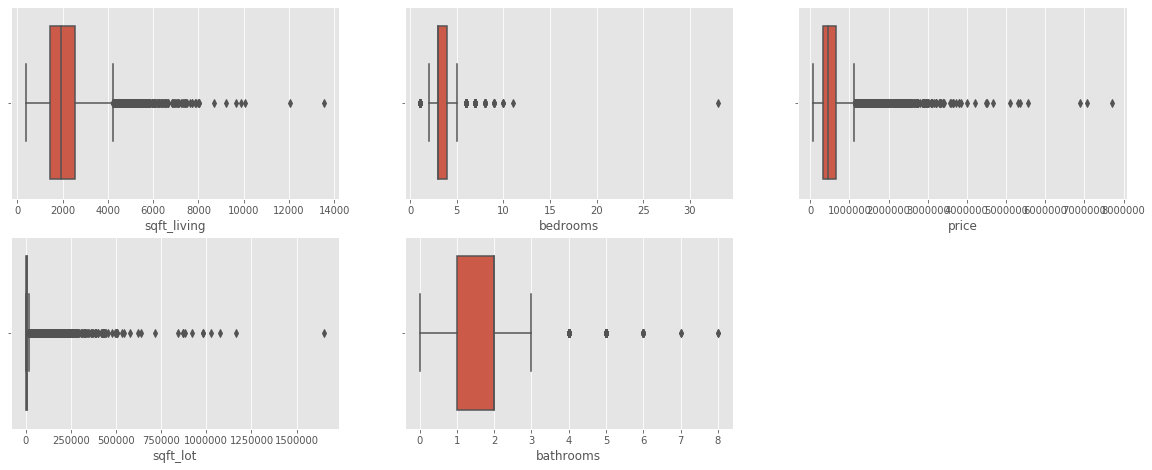

In [1091]:
plt.figure(figsize=(20,12))
plt.subplot(331)
sns.boxplot(df.sqft_living)
plt.subplot(332)
sns.boxplot(df.bedrooms)
plt.subplot(333)
sns.boxplot(df.price)
plt.subplot(334)
sns.boxplot(df.sqft_lot)
plt.subplot(335)
sns.boxplot(df.bathrooms.astype('int'))

In [1092]:
#Value counts of # of bedrooms 
df.bedrooms.value_counts()

3     9824
4     6882
2     2760
5     1601
6      272
1      196
7       38
8       13
9        6
10       3
11       1
33       1
Name: bedrooms, dtype: int64

In [1093]:
#Remove bedrooms that are greater than 6 and check value_counts again to ensure it is gone
df=df[df['bedrooms'] < 7]
df.bedrooms.value_counts()

3    9824
4    6882
2    2760
5    1601
6     272
1     196
Name: bedrooms, dtype: int64

In [1094]:
#Value counts of # of bathrooms 
df.bathrooms.value_counts()

2.50    5374
1.00    3850
1.75    3047
2.25    2044
2.00    1929
1.50    1443
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
4.25      77
0.75      71
4.75      21
5.00      20
5.25      12
5.50       9
1.25       9
6.00       5
0.50       4
5.75       3
6.25       2
6.50       2
8.00       1
7.75       1
6.75       1
Name: bathrooms, dtype: int64

In [1095]:
#Remove bathrooms that are greater than 5 and check value_counts again to ensure it is gone
df=df[df['bathrooms'] < 5]
df.bathrooms.value_counts()

2.50    5374
1.00    3850
1.75    3047
2.25    2044
2.00    1929
1.50    1443
2.75    1179
3.00     744
3.50     725
3.25     587
3.75     152
4.00     128
4.50      95
4.25      77
0.75      71
4.75      21
1.25       9
0.50       4
Name: bathrooms, dtype: int64

In [1096]:
#Value counts of # of floors
df.floors.value_counts()

1.0    10649
2.0     8157
1.5     1902
3.0      610
2.5      155
3.5        6
Name: floors, dtype: int64

In [1097]:
#Remove floors that are greater than 3 and check value_counts again to ensure it is gone
df=df[df['floors'] != 3.5]
df.floors.value_counts()

1.0    10649
2.0     8157
1.5     1902
3.0      610
2.5      155
Name: floors, dtype: int64

In [1098]:
#Value counts of # of floors
df.grade.value_counts()

7     8944
8     6041
9     2608
6     2037
10    1122
11     375
5      242
12      70
4       27
13       6
3        1
Name: grade, dtype: int64

In [1099]:
df=df[df['grade'] < 11]
df.grade.value_counts()

7     8944
8     6041
9     2608
6     2037
10    1122
5      242
4       27
3        1
Name: grade, dtype: int64

In [1100]:
#Value counts of # of floors
df.condition.value_counts()

3    13550
4     5592
5     1681
2      170
1       29
Name: condition, dtype: int64

In [1101]:
df=df[df['condition'] > 1]
df.condition.value_counts()

3    13550
4     5592
5     1681
2      170
Name: condition, dtype: int64

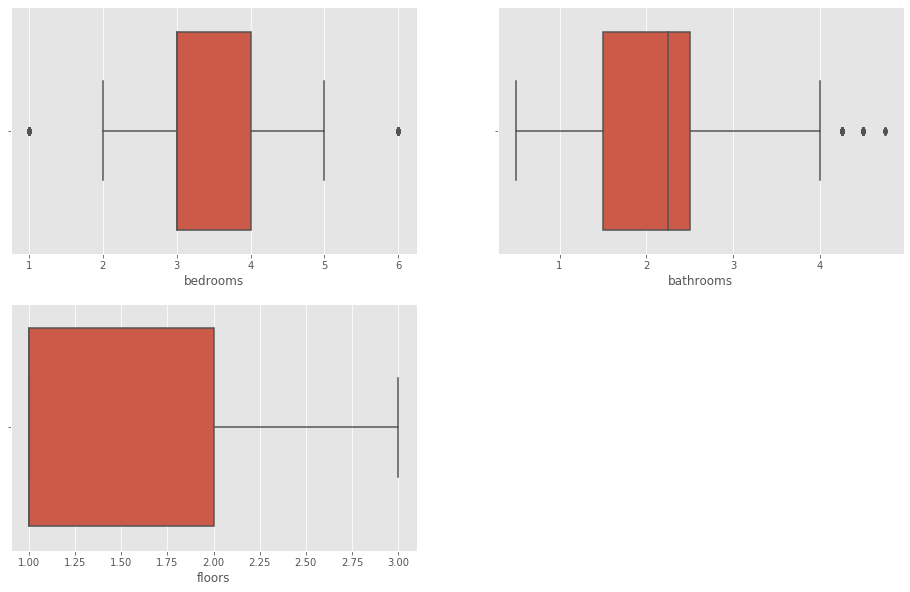

In [1102]:
# Check new boxplots
plt.figure(figsize=(16,10))
plt.subplot(221)
sns.boxplot(x='bedrooms', data=df)
plt.subplot(222)
sns.boxplot(x='bathrooms', data=df)
plt.subplot(223)
sns.boxplot(x='floors', data=df)

I wanted to focus on using only the data that made up the majority of each feature. For the bedrooms, I decided to drop all values that were greater than 6. For the bathrooms, I decided to drop all values greater than 5. For the floors, I decided to drop all values greater than 3. This allowed my boxplots to look better with less outliers.

Next I want to check for outliers in the sqft features.  These include sqft_living, sqft_lot, sqft_above, and sqft_basement.  I will do this by using distplots.

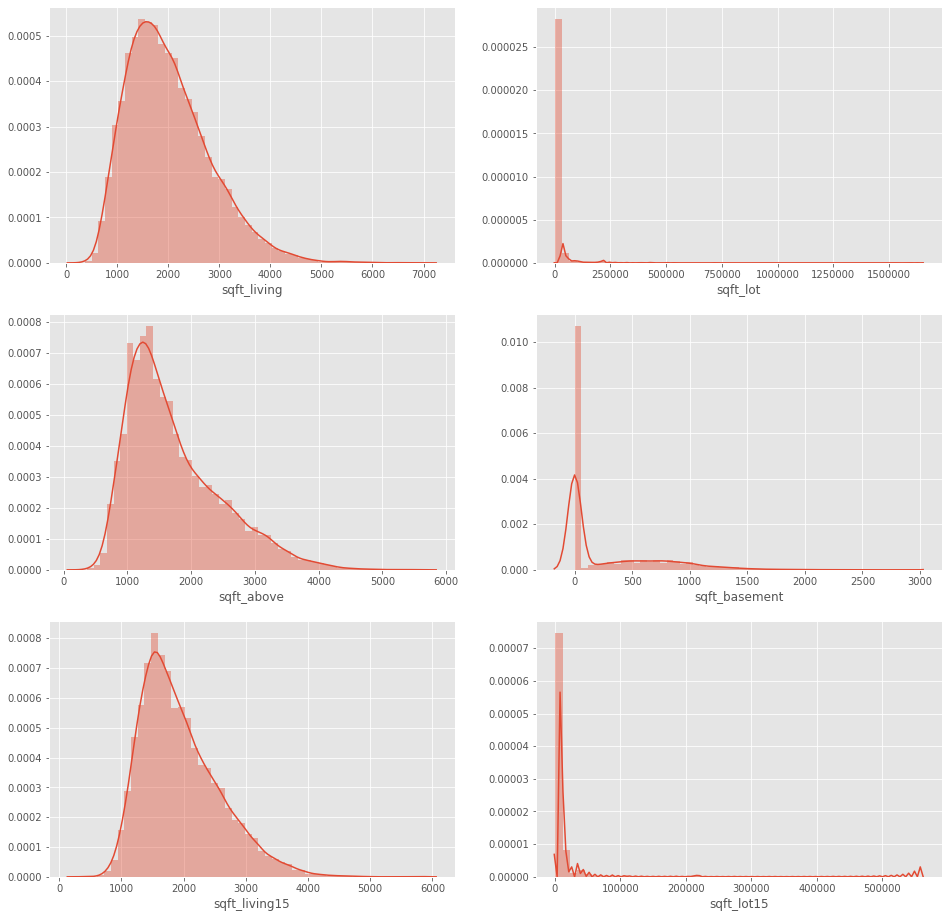

In [1103]:
#Create distplots
plt.figure(figsize=(16,16))
plt.subplot(321)
sns.distplot(df['sqft_living'])
plt.subplot(322)
sns.distplot(df['sqft_lot'])
plt.subplot(323)
sns.distplot(df['sqft_above'])
plt.subplot(324)
sns.distplot(df['sqft_basement'])
plt.subplot(325)
sns.distplot(df['sqft_living15'])
plt.subplot(326)
sns.distplot(df['sqft_lot15'])

In [1104]:
#Removing outliers of each feature
df = df[df['sqft_living'] < 8000]
df = df[df['sqft_lot'] < 60000]
df = df[df['sqft_above'] < 6000]
df = df[df['sqft_basement'] < 3000]
df = df[df['sqft_living15'] < 7000]
df = df[df['sqft_lot15'] < 50000]

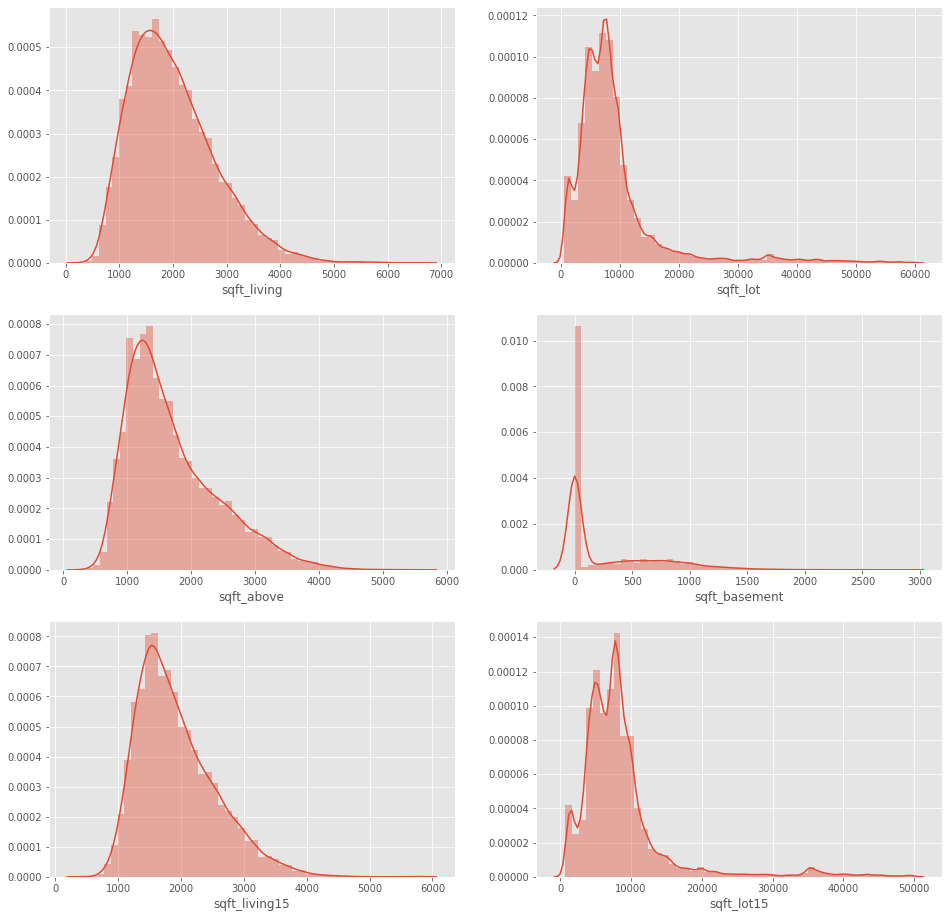

In [1105]:
#Create distplots
plt.figure(figsize=(16,16))
plt.subplot(321)
sns.distplot(df['sqft_living'])
plt.subplot(322)
sns.distplot(df['sqft_lot'])
plt.subplot(323)
sns.distplot(df['sqft_above'])
plt.subplot(324)
sns.distplot(df['sqft_basement'])
plt.subplot(325)
sns.distplot(df['sqft_living15'])
plt.subplot(326)
sns.distplot(df['sqft_lot15'])

I wanted to focus on using only the data that made up the majority of each feature. For the sqft_living, I decided to drop all values that were greater than 7000. For the sqft_lot, I decided to drop all values greater than 250,000. For the sqft_above, I decided to drop all values greater than 6000. For the sqft_basement, I decided to drop all values greater than 2000. This allowed my distplots to look more normal with less outliers.

Finally I want to take a look at price and see how it is distributed using both a distplot and boxplot.

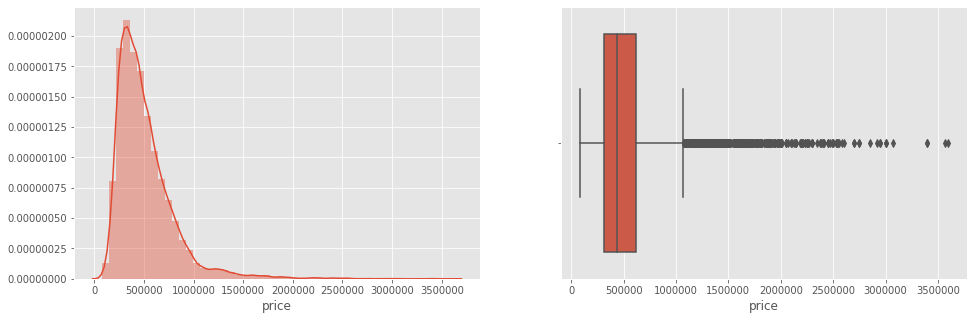

In [1106]:
#Create distplot and boxplot
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['price'])
plt.subplot(122)
sns.boxplot(x='price', data=df)

In [1107]:
##### Remove outliers
df = df[df.price < 3800000] 

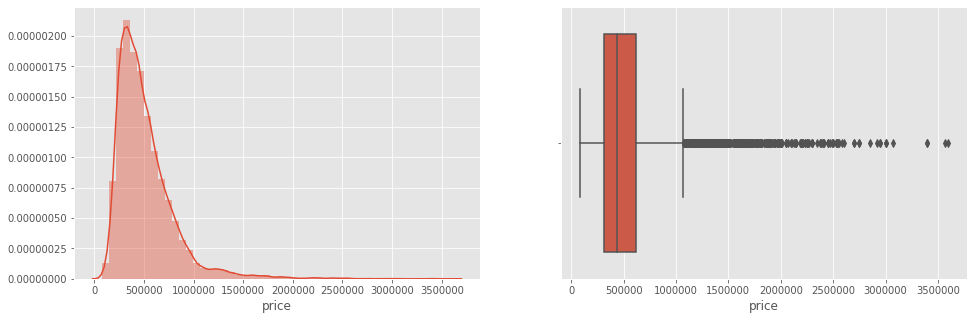

In [1108]:
#Check new distplot and boxplot
plt.figure(figsize=(16,5))
plt.subplot(121)
sns.distplot(df['price'])
plt.subplot(122)
sns.boxplot(x='price', data=df)

I decided on removing any house that were more expensive that $2.75million.  This made both plots look a tiny bit better.

# Checking for Multicollinearity

Text(0.5, 1, 'Feature Correlation')

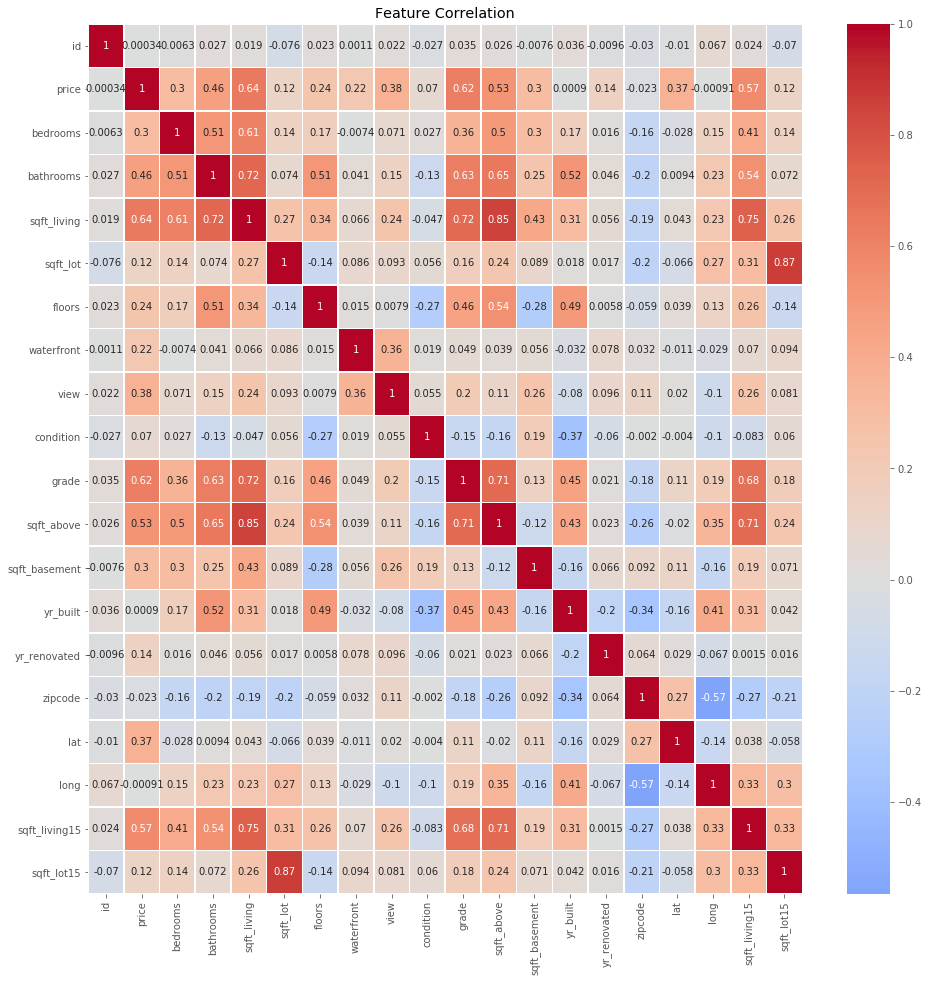

In [1109]:
# Generating a heatmap for numeric data to view correlation between predictors
f, ax = plt.subplots(figsize=(16,16))
sns.heatmap(df.corr(), annot=True, center=0, linewidth=.5, ax=ax, cmap="coolwarm")
plt.title('Feature Correlation')

A sign of multicollinearity is when the correlation is greater than 0.75. Our heatmap is showing that the highest correlation is between sqft_living and sqft_above with a correlation of 0.86.  This is caused by the fact that sqft_above is part of sqft_living.  The pairs sqft_lot/sqft_lot15 and sqft_living/sqft_living15 have a correlation above our threshold as well, which makes sense as they will be exactly the same if the house was not renovated.

Before removing any features, we will check which features have a correlation above 0.75 to ensure that we did not miss anything. 

In [1110]:
# Looking to see which features have higher correlations that 0.75
abs(df.corr()) > 0.75

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
price,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bedrooms,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
bathrooms,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
sqft_living,False,False,False,False,True,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False
sqft_lot,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False,True
floors,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False,False
waterfront,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False,False
view,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
condition,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False


I have decided to drop the sqft_above feature from my dataset to solve the multicollinearity between that and sqft_living.  I feel that sqft_living will be a better indicator on the price of a house since it has a higher correlation with price.  It also seems like a better feature for the non-technical presentation since it is universally used as one of the main features of any house. I will also be dropping sqft_living15 and sqft_lot15 as they are both very similar to sqft_living and sqft_lot.  The final two columns I will drop are the lat and long because they will be captured in the zipcode.

In [1111]:
#Drop columns from dataframe
df.drop(['sqft_living15','sqft_lot15', 'sqft_above', 'date'], axis=1, inplace=True)

In [1112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 20171 entries, 0 to 21596
Data columns (total 17 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             20171 non-null  int64  
 1   price          20171 non-null  float64
 2   bedrooms       20171 non-null  int64  
 3   bathrooms      20171 non-null  float64
 4   sqft_living    20171 non-null  int64  
 5   sqft_lot       20171 non-null  int64  
 6   floors         20171 non-null  float64
 7   waterfront     20171 non-null  float64
 8   view           20171 non-null  float64
 9   condition      20171 non-null  int64  
 10  grade          20171 non-null  int64  
 11  sqft_basement  20171 non-null  float64
 12  yr_built       20171 non-null  int64  
 13  yr_renovated   20171 non-null  float64
 14  zipcode        20171 non-null  int64  
 15  lat            20171 non-null  float64
 16  long           20171 non-null  float64
dtypes: float64(9), int64(8)
memory usage: 2.8 MB


# Checking How Location Affects Price

It is too difficult to visually tell whether there is a direct correllation between zipcode and price.  I will try to use GPS cordinates instead.

In [1113]:
df['price_per_sqft'] = df['price']/df['sqft_living'] # adding price per sqft

In [1114]:
df = df.reset_index() # bring back the id column so we can access it
frequency = df.groupby('zipcode').count()['id'] # group zipcodes, and sum up number of sales
mean = df.groupby('zipcode').mean()['price_per_sqft'] # get mean price/sqft for sales
cluster = pd.concat([frequency, mean], axis=1) # combine these
cluster['zipcode'] = cluster.index
cluster.columns = ['frequency', 'price_per_sqft', 'zipcode']
cluster.describe()

,frequency,price_per_sqft,zipcode
count,70.000000,70.000000,70.000000
mean,288.157143,265.414650,98077.300000
std,141.431976,91.514643,56.622408
min,33.000000,148.209683,98001.000000
25%,187.250000,191.373345,98029.250000
50%,276.000000,250.307969,98067.500000
75%,388.000000,312.166495,98117.750000
max,594.000000,553.600487,98199.000000


In [1115]:
# creating "cheap" group that sell below mean price/sqft (250)
cluster_cheap = cluster[cluster.price_per_sqft < 250]

# temporary cluster of the houses that sell above mean price/sqft
cluster_temp = cluster[cluster.price_per_sqft >= 250]

# creating "low volume, higher priced" group that sell less frequently than the mean
cluster_expensive_low_volume = cluster_temp[cluster_temp.frequency < 277]

# creating "hhigh volume, higher priced" group that sell more frequently than the mean
cluster_expensive_high_volume = cluster_temp[cluster_temp.frequency >= 277]

In [1116]:
def get_zipcode_category(zipcode):
    if zipcode in cluster_cheap.index:
        return 'cheap'
    elif zipcode in cluster_expensive_low_volume.index:
        return 'expensive_low_volume'
    else:
        return 'expensive_high_volume'

In [1117]:
df['zipcode_type'] = df.zipcode.apply(get_zipcode_category)

In [1118]:
df.zipcode_type.value_counts()

cheap                    9065
expensive_high_volume    8594
expensive_low_volume     2512
Name: zipcode_type, dtype: int64

# Continuous Data Normalization

This data contains features that vary greatly in magnitude. In order for the model to be accurate we will need to do the following:

- Log Transform to reduce data skewness
- Min-Max scale to reduce variability

We will first deal with the continuous variables which are:

- sqft_living
- sqft_lot
- sqft_basement

Since we can not perform a log transformation on 0 values, I will replace all the 0's in the sqft_basement column with 1's since ln(1) still equals 0.

# Replace 0's with 1's
df = df.replace({"sqft_basement": 0}, {"sqft_basement": 1})

# Create distplots to check skewness of each variable
columns = ['price', 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'sqft_above', 'sqft_living15', 'sqft_lot','sqft_lot15', 'sqft_basement']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(df[col], hist=True, kde=True, color='blue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Normalize the variables by taking the log
log_sqft_above = np.log(df['sqft_above'])
log_sqft_lot = np.log(df['sqft_lot'])
log_sqft_lot15 = np.log(df['sqft_lot15'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_basement = np.log(df['sqft_basement'])
log_bedrooms = np.log(df["bedrooms"])
log_bathrooms = np.log(df["bathrooms"])
log_floors = np.log(df["floors"])
log_grade = np.log(df["grade"])
log_condition = np.log(df['condition'])


# Fuction to min-max scale each variable 
def scale(cat):
    scale_cat = (cat-min(cat))/(max(cat)-min(cat))
    return scale_cat

def scale(cat):
    log_cat = (cat - np.mean(cat)) / np.sqrt(np.var(cat))
    return log_cat

# Scale the log variables
df['sqft_above'] = scale(log_sqft_above)
df['sqft_lot'] = scale(log_sqft_lot)
df['sqft_lot15'] = scale(log_sqft_lot)
df['sqft_living15'] = scale(log_sqft_living15)
df['sqft_basement'] = scale(log_sqft_basement)
df['bedrooms'] = scale(log_bedrooms)
df['bathrooms'] = scale(log_sqft_basement)
df['floors'] = scale(log_sqft_basement)
df['grade'] = scale(log_sqft_basement)
df['condition'] = scale(log_sqft_basement)

# Create distplots to check skewness of each variable
columns = ['price', 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'sqft_above', 'sqft_living15', 'sqft_lot','sqft_lot15', 'sqft_basement']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(df[col], hist=True, kde=True, color='blue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

We will use spectal clustering to pair each of the cordinate

# Creating Dummies for Categorical Data

We will now transform our Categorical Variables into the catagory datatype and create dummies for each.  We will use the following as our Categorical Variables:
- bedrooms 
- bathrooms
- floors
- waterfront
- view
- condition
- grade 
- yr_built
- yr_renovated
- sqft_basement

I want to first bin sqft_basement and yr_renovated.  I think both of the features would be best seved as being yes/no type questions.

In [1119]:
#binning sqft_basement
bins = [-1 , 1 , df.sqft_basement.max()]
labels = ['0','1']
df.sqft_basement = pd.cut(df.sqft_basement, bins, labels=labels)
df.sqft_basement = df.sqft_basement.astype('category')

#make dummies
sqft_basement = pd.get_dummies(df.sqft_basement, prefix='basement')
df = df.join([sqft_basement])
df.drop(['sqft_basement'], axis=1, inplace=True)

In [1120]:
#binning yr_renovated
bins = [ -1 , 1 , df.yr_renovated.max() ]
labels = ['0','1']
df.yr_renovated = pd.cut(df.yr_renovated, bins, labels=labels)
df.yr_renovated = df.yr_renovated.astype('category')

#make dummies
yr_renovated = pd.get_dummies(df.yr_renovated, prefix='renovated')
df = df.join([yr_renovated])
df.drop(['yr_renovated'], axis=1, inplace=True)

#binning sqft_basement
bins = [-1 , 1 , df.sqft_basement.max()]
bins_base = pd.cut(df['sqft_basement'],bins)
bins_base = bins_base.cat.as_unordered()
bins_base.head()

In [ ]:
# Creating bins for 'yr_renovated'
bins = [ -1 , 1 , df.yr_renovated.max()]
bins_ren = pd.cut(df['yr_renovated'],bins)
bins_ren = bins_ren.cat.as_unordered()
bins_ren.head()

In [ ]:
# Creating bins for 'yr_built'
bins = [1899,1919,1939,1959,1979,1999,2019]
bins_built = pd.cut(df['yr_built'],bins)
bins_built = bins_built.cat.as_unordered()
bins_built.head()


In [ ]:
df['sqft_basement'] = bins_base
df['yr_renovated'] = bins_ren
df['yr_built'] = bins_built

In [1121]:
df.yr_built = df.yr_built.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.floors = df.floors.astype('category')
df.bathrooms = df.bathrooms.astype('category')
df.waterfront = df.waterfront.astype('category')
df.zipcode_type = df.zipcode_type.astype('category')
df.grade = df.grade.astype('category')

#Make Dummies


yr_built = pd.get_dummies(df.yr_built, prefix ='yr_built')
view = pd.get_dummies(df.view, prefix ='view')
condition = pd.get_dummies(df.condition, prefix='condition')
bedrooms = pd.get_dummies(df.bedrooms, prefix='bedrooms')
floors = pd.get_dummies(df.floors, prefix='floors')
bathrooms = pd.get_dummies(df.bathrooms, prefix='bathrooms')      
waterfront = pd.get_dummies(df.waterfront, prefix='waterfront')
zipcd = pd.get_dummies(df.zipcode_type, prefix='zip')
grade = pd.get_dummies(df.grade, prefix='waterfront')


#Add dummies remove original columns

df = df.join([waterfront, condition, bedrooms, floors, bathrooms, view, yr_built, zipcd, grade])
df.drop(['id', 'waterfront','condition','bedrooms', 'floors', 'bathrooms', 'view', 'yr_built', 'zipcode_type', 'grade'], axis=1, inplace=True)

df.yr_built = df.yr_built.astype('category')
df.view = df.view.astype('category')
df.condition = df.condition.astype('category')
df.bedrooms = df.bedrooms.astype('category')
df.floors = df.floors.astype('category')
df.bathrooms = df.bathrooms.astype('category')

df.zipcode_type = df.zipcode_type.astype('category')
df.grade = df.grade.astype('category')

#Make Dummies


yr_built = pd.get_dummies(df.yr_built, prefix ='yr_built')
view = pd.get_dummies(df.view, prefix ='view')
condition = pd.get_dummies(df.condition, prefix='condition')
bedrooms = pd.get_dummies(df.bedrooms, prefix='bedrooms')
floors = pd.get_dummies(df.floors, prefix='floors')
bathrooms = pd.get_dummies(df.bathrooms, prefix='bathrooms')      

zipcd = pd.get_dummies(df.zipcode_type, prefix='zip')
grade = pd.get_dummies(df.grade, prefix='waterfront')


#Add dummies remove original columns

df = df.join([condition, bedrooms, floors, bathrooms, view, yr_built, zipcd, grade])
df.drop(['id','waterfront','condition','bedrooms', 'floors', 'bathrooms', 'view', 'yr_built', 'zipcode_type', 'grade'], axis=1, inplace=True)

In [1122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20171 entries, 0 to 20170
Columns: 179 entries, index to waterfront_10
dtypes: float64(4), int64(4), uint8(171)
memory usage: 4.5 MB


In [1123]:
df.describe()

,index,price,sqft_living,sqft_lot,zipcode,lat,long,price_per_sqft,basement_0,basement_1,renovated_0,renovated_1,waterfront_0.0,waterfront_1.0,condition_2,condition_3,condition_4,condition_5,bedrooms_1,bedrooms_2,bedrooms_3,bedrooms_4,bedrooms_5,bedrooms_6,floors_1.0,floors_1.5,floors_2.0,floors_2.5,floors_3.0,bathrooms_0.5,bathrooms_0.75,bathrooms_1.0,bathrooms_1.25,bathrooms_1.5,bathrooms_1.75,bathrooms_2.0,bathrooms_2.25,bathrooms_2.5,bathrooms_2.75,bathrooms_3.0,bathrooms_3.25,bathrooms_3.5,bathrooms_3.75,bathrooms_4.0,bathrooms_4.25,bathrooms_4.5,bathrooms_4.75,view_0.0,view_1.0,view_2.0,view_3.0,view_4.0,yr_built_1900,yr_built_1901,yr_built_1902,yr_built_1903,yr_built_1904,yr_built_1905,yr_built_1906,yr_built_1907,yr_built_1908,yr_built_1909,yr_built_1910,yr_built_1911,yr_built_1912,yr_built_1913,yr_built_1914,yr_built_1915,yr_built_1916,yr_built_1917,yr_built_1918,yr_built_1919,yr_built_1920,yr_built_1921,yr_built_1922,yr_built_1923,yr_built_1924,yr_built_1925,yr_built_1926,yr_built_1927,yr_built_1928,yr_built_1929,yr_built_1930,yr_built_1931,yr_built_1932,yr_built_1933,yr_built_1934,yr_built_1935,yr_built_1936,yr_built_1937,yr_built_1938,yr_built_1939,yr_built_1940,yr_built_1941,yr_built_1942,yr_built_1943,yr_built_1944,yr_built_1945,yr_built_1946,yr_built_1947,yr_built_1948,yr_built_1949,yr_built_1950,yr_built_1951,yr_built_1952,yr_built_1953,yr_built_1954,yr_built_1955,yr_built_1956,yr_built_1957,yr_built_1958,yr_built_1959,yr_built_1960,yr_built_1961,yr_built_1962,yr_built_1963,yr_built_1964,yr_built_1965,yr_built_1966,yr_built_1967,yr_built_1968,yr_built_1969,yr_built_1970,yr_built_1971,yr_built_1972,yr_built_1973,yr_built_1974,yr_built_1975,yr_built_1976,yr_built_1977,yr_built_1978,yr_built_1979,yr_built_1980,yr_built_1981,yr_built_1982,yr_built_1983,yr_built_1984,yr_built_1985,yr_built_1986,yr_built_1987,yr_built_1988,yr_built_1989,yr_built_1990,yr_built_1991,yr_built_1992,yr_built_1993,yr_built_1994,yr_built_1995,yr_built_1996,yr_built_1997,yr_built_1998,yr_built_1999,yr_built_2000,yr_built_2001,yr_built_2002,yr_built_2003,yr_built_2004,yr_built_2005,yr_built_2006,yr_built_2007,yr_built_2008,yr_built_2009,yr_built_2010,yr_built_2011,yr_built_2012,yr_built_2013,yr_built_2014,yr_built_2015,zip_cheap,zip_expensive_high_volume,zip_expensive_low_volume,waterfront_3,waterfront_4,waterfront_5,waterfront_6,waterfront_7,waterfront_8,waterfront_9,waterfront_10
count,20171.000000,2.017100e+04,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.00000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20171.000000,20

df['waterfront'] = df['waterfront'].astype('category')
waterfront = pd.get_dummies(df['waterfront'], prefix='wf', drop_first=True)

df['view'] = df['view'].astype('category')
view = pd.get_dummies(df['view'], prefix='vw', drop_first=True)

df['yr_built'] = df['yr_built'].astype('category')
yr_built = pd.get_dummies(df['yr_built'], prefix='blt', drop_first=True)

df['labellocation'] = df['labellocation'].astype('category')
labellocation = pd.get_dummies(df['labellocation'], prefix='loc', drop_first=True)

df['condition'] = df['condition'].astype('category')
condition = pd.get_dummies(df['condition'], prefix='con', drop_first=True)

df['grade'] = df['grade'].astype('category')
condition = pd.get_dummies(df['grade'], prefix='grd', drop_first=True)

df['bedrooms'] = df['bedrooms'].astype('category')
bedrooms = pd.get_dummies(df['bedrooms'], prefix='bed', drop_first=True)

df['floors'] = df['floors'].astype('category')
floors = pd.get_dummies(df['floors'], prefix='flr', drop_first=True)

df['bathrooms'] = df['bathrooms'].astype('category')
bathrooms = pd.get_dummies(df['bathrooms'], prefix='bath', drop_first=True)


df.head

for column in df.iloc[:,11:].columns:
    df[column] = df[column].astype("category")

In [1124]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20171 entries, 0 to 20170
Columns: 179 entries, index to waterfront_10
dtypes: float64(4), int64(4), uint8(171)
memory usage: 4.5 MB


# Continuous Data Normalization

This data contains features that vary greatly in magnitude. In order for the model to be accurate we will need to do the following:

- Log Transform to reduce data skewness
- Min-Max scale to reduce variability

We will first deal with the continuous variables which are:

- sqft_living
- sqft_lot
- sqft_basement

Since we can not perform a log transformation on 0 values, I will replace all the 0's in the sqft_basement column with 1's since ln(1) still equals 0.

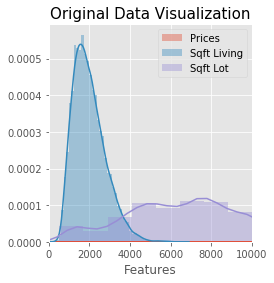

In [1125]:
#distplot of our raw data
plt.figure(figsize=(8,4))
plt.subplot(122)
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Original Data Visualization', fontdict={'fontsize': 15})
plt.xlabel('Features')
plt.xlim(0, 10000)
plt.legend()
plt.show()

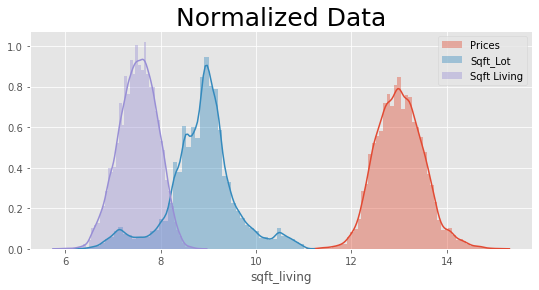

In [1126]:
price = np.log(df.price)
sqft_living = np.log(df.sqft_living)
sqft_lot = np.log(df.sqft_lot)

plt.figure(figsize=(9,4))
sns.distplot(price, label='Prices')
sns.distplot(sqft_lot, label = 'Sqft_Lot')
sns.distplot(sqft_living, label = 'Sqft Living')
plt.title('Normalized Data', fontdict={'fontsize' : 25})
plt.legend()
plt.show()

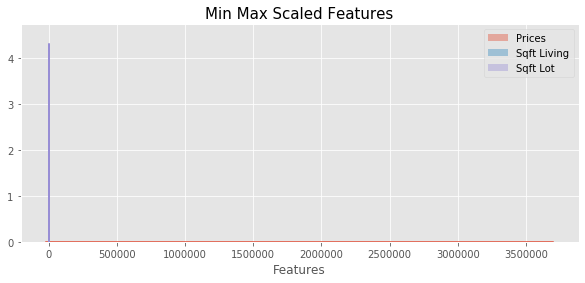

In [1127]:

df['sqft_living'] = ( sqft_living - min(sqft_living) ) / ( max(sqft_living) - min(sqft_living) )
df['sqft_lot'] = ( sqft_lot - min(sqft_lot) ) / ( max(sqft_lot) - min(sqft_lot) )

plt.figure(figsize=(10,4))
sns.distplot(df.price, label='Prices')
sns.distplot(df.sqft_living, label='Sqft Living')
sns.distplot(df.sqft_lot, label='Sqft Lot')
plt.title('Min Max Scaled Features', fontdict={'fontsize': 15})
plt.xlabel('Features')
plt.legend()
plt.show()

# Replace 0's with 1's
df = df.replace({"sqft_basement": 0}, {"sqft_basement": 1})

# Create distplots to check skewness of each variable
columns = ['price', 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'sqft_above', 'sqft_living15', 'sqft_lot','sqft_lot15', 'sqft_basement']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(df[col], hist=True, kde=True, color='blue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Normalize the variables by taking the log
log_sqft_above = np.log(df['sqft_above'])
log_sqft_lot = np.log(df['sqft_lot'])
log_sqft_lot15 = np.log(df['sqft_lot15'])
log_sqft_living15 = np.log(df['sqft_living15'])
log_sqft_basement = np.log(df['sqft_basement'])
log_bedrooms = np.log(df["bedrooms"])
log_bathrooms = np.log(df["bathrooms"])
log_floors = np.log(df["floors"])
log_grade = np.log(df["grade"])
log_condition = np.log(df['condition'])


# Fuction to min-max scale each variable 
def scale(cat):
    scale_cat = (cat-min(cat))/(max(cat)-min(cat))
    return scale_cat

def scale(cat):
    log_cat = (cat - np.mean(cat)) / np.sqrt(np.var(cat))
    return log_cat

# Scale the log variables
df['sqft_above'] = scale(log_sqft_above)
df['sqft_lot'] = scale(log_sqft_lot)
df['sqft_lot15'] = scale(log_sqft_lot)
df['sqft_living15'] = scale(log_sqft_living15)
df['sqft_basement'] = scale(log_sqft_basement)
df['bedrooms'] = scale(log_bedrooms)
df['bathrooms'] = scale(log_sqft_basement)
df['floors'] = scale(log_sqft_basement)
df['grade'] = scale(log_sqft_basement)
df['condition'] = scale(log_sqft_basement)

# Create distplots to check skewness of each variable
columns = ['price', 'bedrooms', 'bathrooms', 'floors', 'grade', 'condition', 'sqft_above', 'sqft_living15', 'sqft_lot','sqft_lot15', 'sqft_basement']
for i, col in enumerate(columns):
    plt.figure(i)
    sns.distplot(df[col], hist=True, kde=True, color='blue')
    plt.title('Distribution of ' + col)
    plt.xlabel(col)
    plt.ylabel('Frequency')

# Modeling

# Import libraries needed to perform linear regressiond
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

linreg = LinearRegression()

In [1128]:
def linear_regression(X, y):
    
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)
    linreg = LinearRegression()
    linreg.fit(X_train, y_train)
    AVGPP = linreg.predict(X_test)
    
    print('R^2 Score:', linreg.score(X, y))
    print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, AVGPP)))
    print('MAE:', metrics.mean_absolute_error(y_test, AVGPP))
    
    print('AVG Predicted Price:', (AVGPP.mean()))
    print('AVG Actual Price:', y_test.mean())
    return (linreg, AVGPP, y_test)

In [1129]:
X = df.drop(['price', 'price_per_sqft'], axis=1)
y = df.price

In [1130]:
linear_regression(X,y)

R^2 Score: 0.7574130392140881
RMSE: 142719.79697726783
MAE: 94286.3604523434
AVG Predicted Price: 506776.106344825
AVG Actual Price: 503914.1261829653


(LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False),
 array([677442.296875  , 382164.44921875, 846878.234375  , ...,
        402037.8984375 , 623953.0625    , 146058.44921875]),
 7426     630000.0
 3559     582500.0
 247      525000.0
 6551     717000.0
 13184    475000.0
            ...   
 5936     870000.0
 14460    415000.0
 16600    455000.0
 7687     660000.0
 8843     230000.0
 Name: price, Length: 6657, dtype: float64)

In [1131]:
linreg=LinearRegression()
selector = RFE(linreg, n_features_to_select = 87)
selector = selector.fit(X, y)
selector

RFE(estimator=LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
                               normalize=False),
    n_features_to_select=87, step=1, verbose=0)

In [1132]:
estimators = selector.estimator_
print(estimators.coef_)
print(estimators.intercept_)

[ 9.19062960e+16  9.19062960e+16  9.19062960e+16  9.19062960e+16
  9.19062961e+16  9.19062960e+16  3.42133315e+17  3.42133315e+17
  3.42133315e+17  3.42133315e+17  3.42133315e+17 -3.46575000e+17
 -3.46575000e+17 -3.46575000e+17 -3.46575000e+17 -3.46575000e+17
 -3.46575000e+17 -3.46575000e+17 -3.46575000e+17 -3.46575000e+17
 -3.46575000e+17 -3.46575000e+17 -3.46575000e+17 -3.46575000e+17
 -3.46575000e+17 -3.46575000e+17 -3.46575000e+17 -3.46575000e+17
 -3.46575000e+17 -3.29655118e+17 -3.29655118e+17 -3.29655118e+17
 -3.29655118e+17 -3.29655118e+17 -5.74930000e+04 -5.78910000e+04
 -6.88890000e+04 -6.49845000e+04 -5.21020000e+04 -8.47660000e+04
 -8.06000000e+04 -6.18545000e+04 -7.18152500e+04 -7.46237500e+04
 -7.92415000e+04 -9.33232500e+04 -1.02428625e+05 -1.19418500e+05
 -1.15652000e+05 -1.09488500e+05 -1.41318000e+05 -1.33772500e+05
 -1.30788000e+05 -1.17605000e+05 -1.18626000e+05 -9.78220000e+04
 -1.10394000e+05 -1.36287500e+05 -1.43111000e+05 -1.20746000e+05
 -1.11923000e+05 -1.05016

# import linear regression library
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import sklearn.metrics as metrics

linreg = LinearRegression()

# our feature variables
X = df.drop(['price_per_sqft', 'price'], axis=1)

# our target variable
y = df['price']

# separate our data into testing and training subsets
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)

# fitting our training feature variables to our training target variable (price)
linreg.fit(X_train, y_train)

# predicted prices from our training subset
y_hat_train = linreg.predict(X_train)

# predicted prices from our testing subset
y_hat_test = linreg.predict(X_test)

# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean square error for our test and training results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', round(train_mse,2))
print('Test Mean Squared Error:', round(test_mse,2))

# calculate r-squared
r2 = round(linreg.score(X,y), 3)
print("R Squared:", r2)

# calculate mean absolute error
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:", round(mean_abs_err,2))

# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("Root Mean Squared Error:", round(rmse,2))

# calculate mean predicted price and mean actual price
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("Average Predicted Price:", round(average_predicted_price,2))
print("Average Actual Price:", round(average_actual_price,2))
print("Difference:", round(average_predicted_price - average_actual_price, 2))

# Setting up our X and y
X = df.drop(['price'], axis=1)
y = df['price']

# Setting up our train and test variables
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=2)
linreg.fit(X_train, y_train)
y_hat_train = linreg.predict(X_train)
y_hat_test = linreg.predict(X_test)
# calculating residuals
train_residuals = y_hat_train - y_train
test_residuals = y_hat_test - y_test

# calculate mean square error for our test and training results
train_mse = mean_squared_error(y_train, y_hat_train)
test_mse = mean_squared_error(y_test, y_hat_test)
print('Train Mean Squared Error:', round(train_mse,2))
print('Test Mean Squared Error:', round(test_mse,2))

# calculate r-squared
r2 = round(linreg.score(X,y), 3)
print("R Squared:", r2)

# calculate mean absolute error
mean_abs_err = metrics.mean_absolute_error(y_test, y_hat_test)
print("Mean Absolute Error:", round(mean_abs_err,2))

# calculate root mean squared error
rmse = np.sqrt(metrics.mean_squared_error(y_test, y_hat_test))
print("Root Mean Squared Error:", round(rmse,2))

# calculate mean predicted price and mean actual price
average_predicted_price = y_hat_test.mean()
average_actual_price = y_test.mean()
print("Average Predicted Price:", round(average_predicted_price,2))
print("Average Actual Price:", round(average_actual_price,2))
print("Difference:", round(average_predicted_price - average_actual_price, 2))

X_features = pd.DataFrame([])
X_features = X.iloc[:,:10]
for column in X.iloc[:,10:].columns:
    X_features[column] = X[column].astype(float)

X_features.info()

import statsmodels.api as sm

def stepwise_selection(X, y, 
                       initial_list=[], 
                       threshold_in=0.01, 
                       threshold_out = 0.05, 
                       verbose=True):
    """ Perform a forward-backward feature selection 
    based on p-value from statsmodels.api.OLS
    Arguments:
        X - pandas.DataFrame with candidate features
        y - list-like with the target
        initial_list - list of features to start with (column names of X)
        threshold_in - include a feature if its p-value < threshold_in
        threshold_out - exclude a feature if its p-value > threshold_out
        verbose - whether to print the sequence of inclusions and exclusions
    Returns: list of selected features 
    Always set threshold_in < threshold_out to avoid infinite looping.
    See https://en.wikipedia.org/wiki/Stepwise_regression for the details
    """
    included = list(initial_list)
    while True:
        changed=False
        # forward step
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))

        # backward step
        model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included]))).fit()
        # use all coefs except intercept
        pvalues = model.pvalues.iloc[1:]
        worst_pval = pvalues.max() # null if pvalues is empty
        if worst_pval > threshold_out:
            changed=True
            worst_feature = pvalues.argmax()
            included.remove(worst_feature)
            if verbose:
                print('Drop {:30} with p-value {:.6}'.format(worst_feature, worst_pval))
        if not changed:
            break
    return included

# iterating through our initial feature variables to see if we can remove any with high p-values
result=stepwise_selection(X, y, verbose=True)
print('resulting features:')
print(result)